Import  

In [19]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ouverture fichier

In [4]:
emb = pd.read_csv('C:/Users/thoma/SHARE/Firstsample/emb2.csv')


Exploration des variables

In [ ]:
#sns.pairplot(emb)


Nettoyage / transformation des données

<Axes: xlabel='cancer', ylabel='age'>

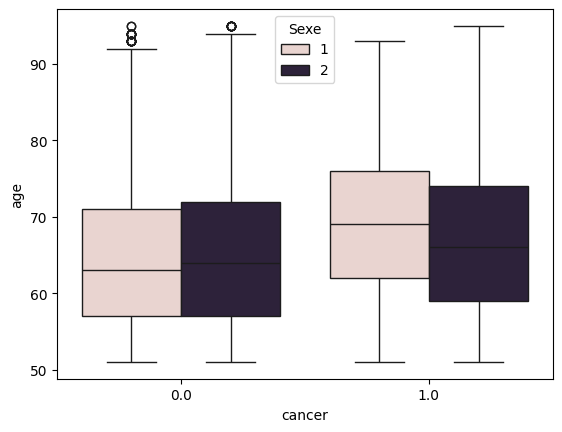

In [28]:
# remove v naissance outliers

# Calcul de Q1, Q3 et IQR
Q1 = emb['naissance'].quantile(0.25)
Q3 = emb['naissance'].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes pour filtrer les outliers
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Filtrage des valeurs aberrantes
emb_filtré = emb[(emb['naissance'] >= borne_inf) & (emb['naissance'] <= borne_sup)]
emb_filtré = emb_filtré [(emb_filtré['cancer']) >= 0]

# emb_filtré est maintenant votre DataFrame sans les outliers

#Transformation de la variabe naissance en âge
emb_filtré['age'] = 2004 - emb_filtré['naissance']
emb_filtré = emb_filtré [emb_filtré['age'] > 50]




Visualisation

<Axes: >

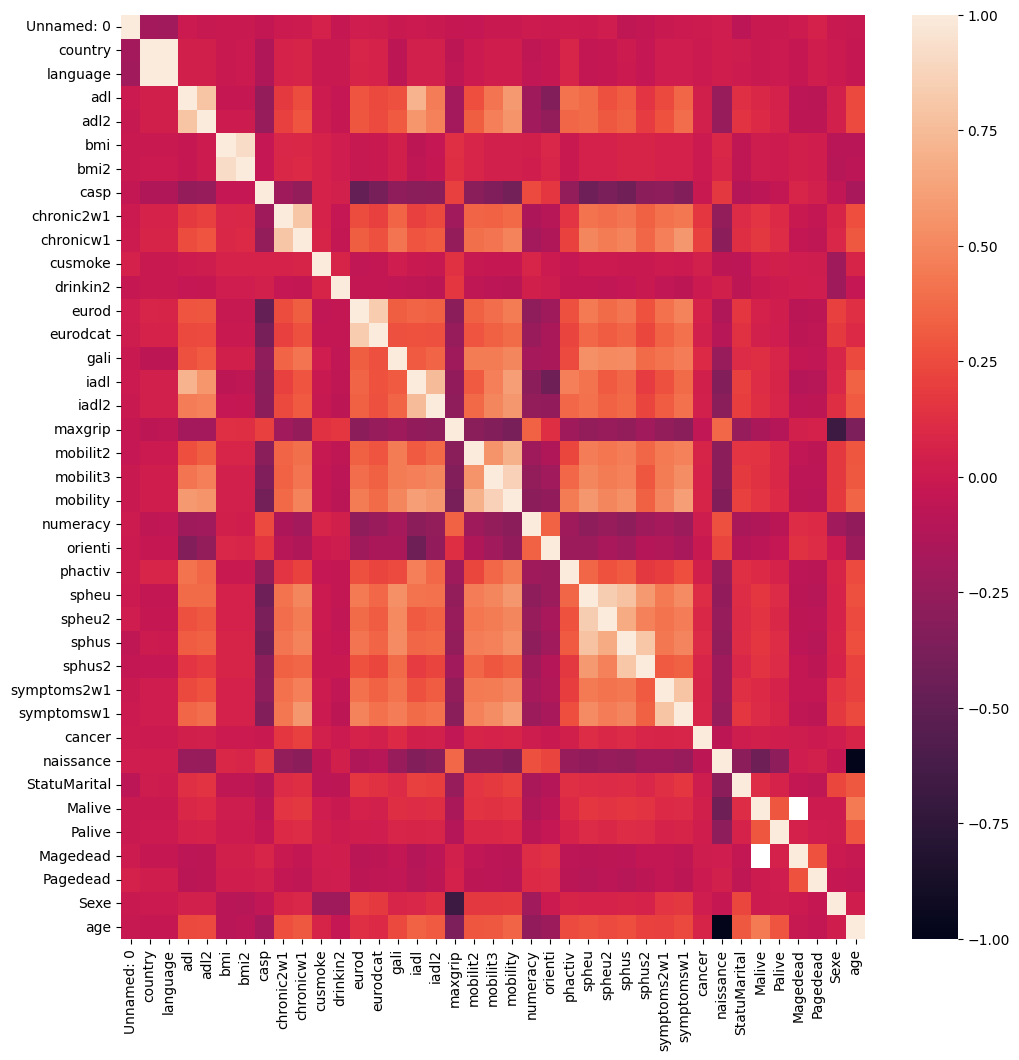

In [29]:
# Boxplot test age/genre/cancer
#sns.catplot(x="cancer", y= "naissance", data = emb_filtré, hue = "Sexe", kind="swarm" )
#sns.catplot(x="cancer", y="naissance", hue="Sexe", data=emb_filtré.head(100), kind="swarm")
sns.boxplot(x="cancer", y="age", hue="Sexe", data=emb_filtré)


# heatmap sur sdf df-numérique
# Identifier les variables numériques
col_num = emb_filtré.select_dtypes(include=[np.number]).columns
df_numerique = emb_filtré[col_num]

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_numerique.corr(), ax=ax)

In [30]:
test = emb_filtré.drop(axis=0, inplace = True)

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'